### Data Loading, Storage and File Formats

In [1]:
import pandas as pd
import numpy as np

In [2]:
csv_data = pd.read_csv('sales_data.csv', encoding=('ISO-8859-1'),index_col=0)  # Replace 'sales_data.csv' with your CSV file name
excel_data = pd.read_excel('sales_data.xlsx')  # Replace 'sales_data.xlsx' with your Excel file name
json_data = pd.read_json('sales_data.json')

In [3]:
print("CSV Data:")
print(csv_data.head())
print("\nExcel Data:")
print(excel_data.head())
print("\nJSON Data:")
print(json_data.head())

CSV Data:
             QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
ORDERNUMBER                                                         
10107                     30      95.70                2  2871.00   
10121                     34      81.35                5  2765.90   
10134                     41      94.74                2  3884.34   
10145                     45      83.26                6  3746.70   
10159                     49     100.00               14  5205.27   

                   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  \
ORDERNUMBER                                                                     
10107         2/24/2003 0:00  Shipped       1         2     2003  Motorcycles   
10121          5/7/2003 0:00  Shipped       2         5     2003  Motorcycles   
10134          7/1/2003 0:00  Shipped       3         7     2003  Motorcycles   
10145         8/25/2003 0:00  Shipped       3         8     2003  Motorcycles   
10159        10/10/2

In [4]:
csv_data = csv_data.fillna(0)  # Replace NaN values with 0

In [5]:
merged_data = pd.concat([csv_data, excel_data, json_data], axis=0)

In [6]:
# Task 6: Analyze the sales data
# Example: Calculate total sales
total_sales = merged_data['SALES'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 30097886.55


In [7]:
average_order_value = merged_data['SALES'].mean()
print(f"Average Order Value: {average_order_value}")

Average Order Value: 3553.8890719093265


In [8]:
product_category_distribution = merged_data['SALES'].value_counts()
print("Product Category Distribution:")
print(product_category_distribution)

Product Category Distribution:
3003.00    9
5464.69    6
2257.92    6
5004.80    6
2172.48    6
          ..
2312.24    3
2793.71    3
1908.28    3
3441.37    3
2116.16    3
Name: SALES, Length: 2763, dtype: int64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('sales_data.csv', encoding=('ISO-8859-1'),index_col=0)

In [3]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   obj

In [5]:
df.describe

<bound method NDFrame.describe of              QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
ORDERNUMBER                                                         
10107                     30      95.70                2  2871.00   
10121                     34      81.35                5  2765.90   
10134                     41      94.74                2  3884.34   
10145                     45      83.26                6  3746.70   
10159                     49     100.00               14  5205.27   
...                      ...        ...              ...      ...   
10350                     20     100.00               15  2244.40   
10373                     29     100.00                1  3978.51   
10386                     43     100.00                4  5417.57   
10397                     34      62.24                1  2116.16   
10414                     47      65.52                9  3079.44   

                   ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  \

In [6]:
df["Date"] = pd.to_datetime(df["ORDERDATE"])
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Date
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2003-02-24
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2003-05-07
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003-07-01
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,2003-08-25
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,2003-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,2004-12-02
10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,2005-01-31
10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,2005-03-01


In [7]:
df.fillna(value='none',axis=0,inplace=True)

In [8]:
df.isnull().sum()

QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
Date                0
dtype: int64

In [9]:
df = df.rename(columns={"ORDERNUMBER": "Order_Number",
                   "QUANTITYORDERED":"Quantity_Order",
                   "PRICEEACH":"Price_Each",
                   "ORDERLINENUMBER":"Order_Line_Number",
                   "ORDERDATE":"Order_Date",
                   "PRODUCTLINE":"Product_Line",
                   "PRODUCTCODE":"Product_Code",
                   "CUSTOMERNAME":"Customer_Name",
                   "POSTALCODE":"Postal_Code",
                   "CONTACTLASTNAME":"Contact_Last_Name",
                   "DEALSIZE":"Deal_Size"
                  })

In [10]:
df

,Quantity_Order,Price_Each,Order_Line_Number,SALES,Order_Date,STATUS,QTR_ID,MONTH_ID,YEAR_ID,Product_Line,...,ADDRESSLINE2,CITY,STATE,Postal_Code,COUNTRY,TERRITORY,Contact_Last_Name,CONTACTFIRSTNAME,Deal_Size,Date
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,none,NYC,NY,10022,USA,none,Yu,Kwai,Small,2003-02-24
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,none,Reims,none,51100,France,EMEA,Henriot,Paul,Small,2003-05-07
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,none,Paris,none,75508,France,EMEA,Da Cunha,Daniel,Medium,2003-07-01
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,none,Pasadena,CA,90003,USA,none,Young,Julie,Medium,2003-08-25
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,none,San Francisco,CA,none,USA,none,Brown,Julie,Medium,2003-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,...,none,Madrid,none,28034,Spain,EMEA,Freyre,Diego,Small,2004-12-02
10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,...,none,Oulu,none,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,2005-01-31
10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,...,none,Madrid,none,28034,Spain,EMEA,Freyre,Diego,Medium,2005-03-01


In [11]:
#Dropping unimportant columns
df.drop("Order_Date",axis=1,inplace=True)
df.drop("ADDRESSLINE2",axis=1,inplace=True)
df.drop("STATE",axis=1,inplace=True)
df.drop("Postal_Code",axis=1,inplace=True)
df.drop("TERRITORY",axis=1,inplace=True)
df

,Quantity_Order,Price_Each,Order_Line_Number,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,Product_Line,MSRP,Product_Code,Customer_Name,PHONE,ADDRESSLINE1,CITY,COUNTRY,Contact_Last_Name,CONTACTFIRSTNAME,Deal_Size,Date
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small,2003-02-24
10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small,2003-05-07
10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium,2003-07-01
10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium,2003-08-25
10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium,2003-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,20,100.00,15,2244.40,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Small,2004-12-02
10373,29,100.00,1,3978.51,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,Finland,Koskitalo,Pirkko,Medium,2005-01-31
10386,43,100.00,4,5417.57,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,Spain,Freyre,Diego,Medium,2005-03-01


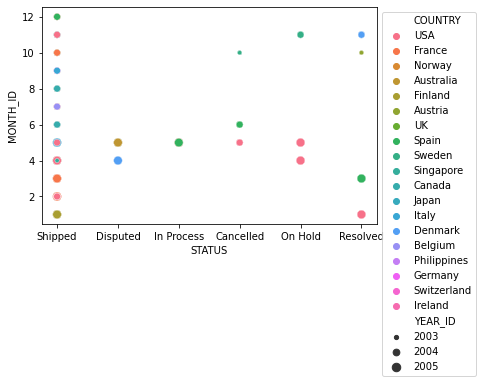

In [12]:
#Plotting Scatterplot
sns.scatterplot( x="STATUS", y="MONTH_ID", data=df,
                hue='COUNTRY', size='YEAR_ID')

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

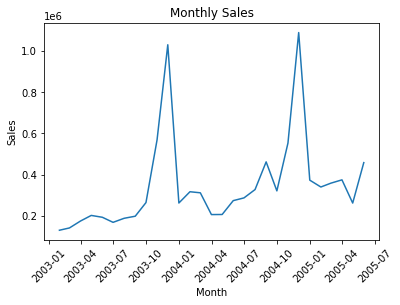

In [13]:

#Montly sales
df["Date"] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['SALES'].sum()
plt.plot(monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='MONTH_ID'>

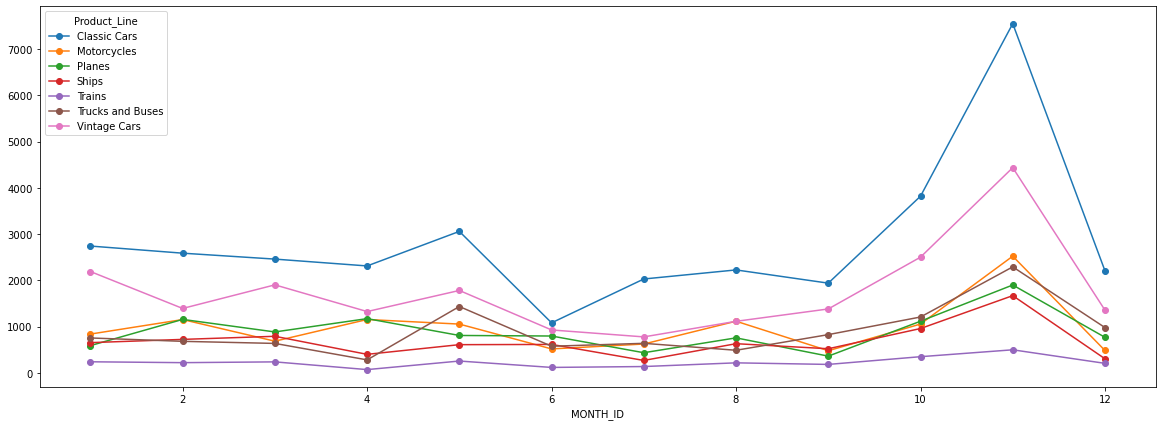

In [14]:
data = df.groupby(["MONTH_ID","Product_Line"])["Quantity_Order"].sum().unstack()
data.plot(figsize=(20,7), marker="o")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

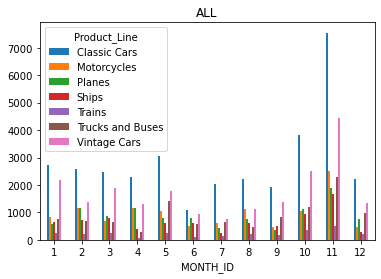

In [15]:
#bar graphs of 
data = df.groupby(["MONTH_ID","Product_Line"])["Quantity_Order"].sum().unstack()
data.plot(kind ="bar",stacked=False, title="ALL")
plt.xticks(rotation=0)

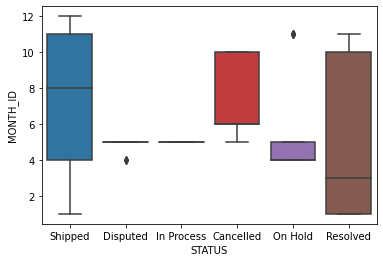

In [16]:
sns.boxplot( x="STATUS", y= "MONTH_ID", data= df, )
plt.show()

In [17]:
#Checking the data only for shipped STATUS
data1=df[df["STATUS"]=='Shipped']
data1.head()

,Quantity_Order,Price_Each,Order_Line_Number,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,Product_Line,MSRP,Product_Code,Customer_Name,PHONE,ADDRESSLINE1,CITY,COUNTRY,Contact_Last_Name,CONTACTFIRSTNAME,Deal_Size,Date
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,Yu,Kwai,Small,2003-02-24
10121,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,Henriot,Paul,Small,2003-05-07
10134,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,Da Cunha,Daniel,Medium,2003-07-01
10145,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,Young,Julie,Medium,2003-08-25
10159,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,Brown,Julie,Medium,2003-10-10


In [18]:
data1.shape

(2617, 20)

In [19]:
#Calculating sum for sales column
sum_sales = df['SALES'].sum()
print("Addition of all sales",sum_sales)

Addition of all sales 10032628.85


In [20]:
#Calulating average for sales column
sales_avg = df['SALES'].mean()
print("Average of total sales = ",sales_avg)

Average of total sales =  3553.88907190932


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


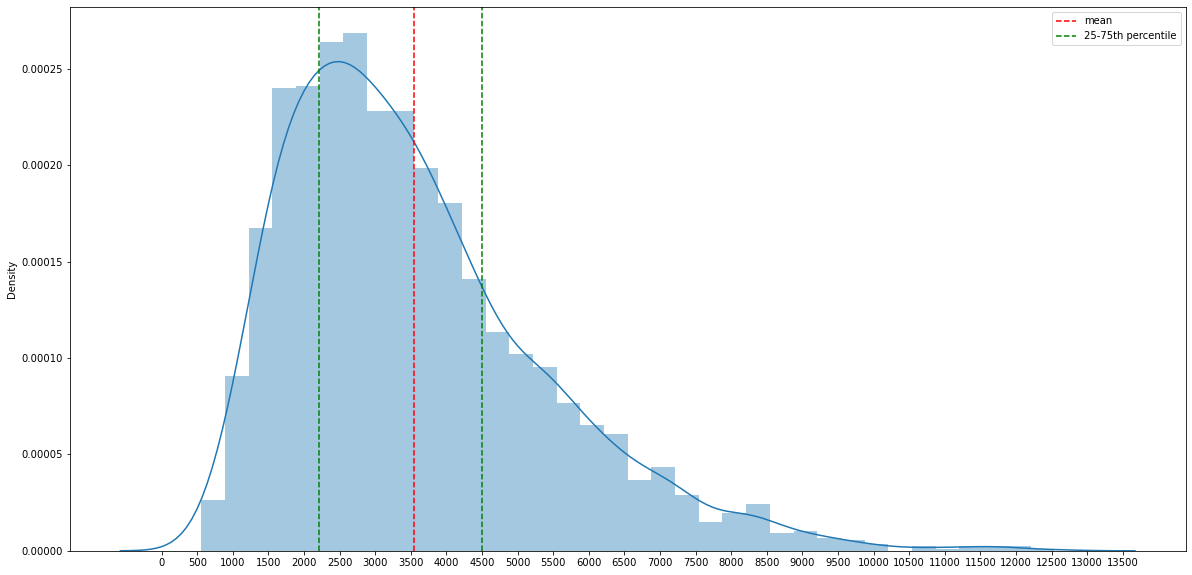

In [26]:
plt.figure(figsize=(20,10))
sns.distplot(x = data1['SALES'])
plt.axvline(x = np.mean(data1['SALES']), c = 'red', ls = '--', label = 'mean')
plt.axvline(x = np.percentile(data1['SALES'], 25), c = 'green', ls = '--', label = '25-75th percentile')
plt.axvline(x = np.percentile(data1['SALES'], 75), c = 'green', ls = '--')
plt.xticks(np.arange(0,14000,500))
plt.legend()
plt.show()

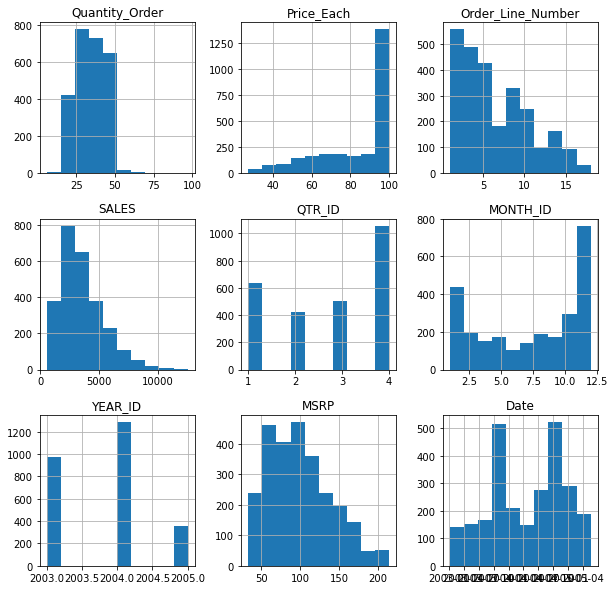

In [28]:
data1.hist(figsize = (10,10))
plt.show()